In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns

In [73]:
df = pd.read_csv("train.csv")
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [74]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

DOES TYPE INFLUENCE THE ITEM SALES

In [75]:
type_ols = ols('Item_Outlet_Sales ~ Item_Type', data=df).fit()
table = anova_lm(type_ols,typ=2)
print(table)

                 sum_sq      df         F    PR(>F)
Item_Type  1.176182e+08    15.0  2.700653  0.000388
Residual   2.469965e+10  8507.0       NaN       NaN


In [76]:
compare = pairwise_tukeyhsd(df['Item_Outlet_Sales'], df['Item_Type'], alpha=0.05)
dd=pd.DataFrame(compare._results_table.data)
dd

C:\Users\admin\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,0,1,2,3,4,5,6
0,group1,group2,meandiff,p-adj,lower,upper,reject
1,Baking Goods,Breads,251.161,0.8352,-182.986,685.3081,False
2,Baking Goods,Breakfast,158.8374,0.9999,-443.3506,761.0255,False
3,Baking Goods,Canned,272.2237,0.2268,-52.0722,596.5196,False
4,Baking Goods,Dairy,279.5714,0.1728,-40.7806,599.9234,False
...,...,...,...,...,...,...,...
116,Seafood,Soft Drinks,-319.5542,0.9911,-1100.2292,461.1208,False
117,Seafood,Starchy Foods,48.2668,1.0,-825.365,921.8987,False
118,Snack Foods,Soft Drinks,-270.81,0.2338,-594.9209,53.3009,False
119,Snack Foods,Starchy Foods,97.011,1.0,-411.7394,605.7615,False


AxesSubplot(0.125,0.11;0.775x0.77)


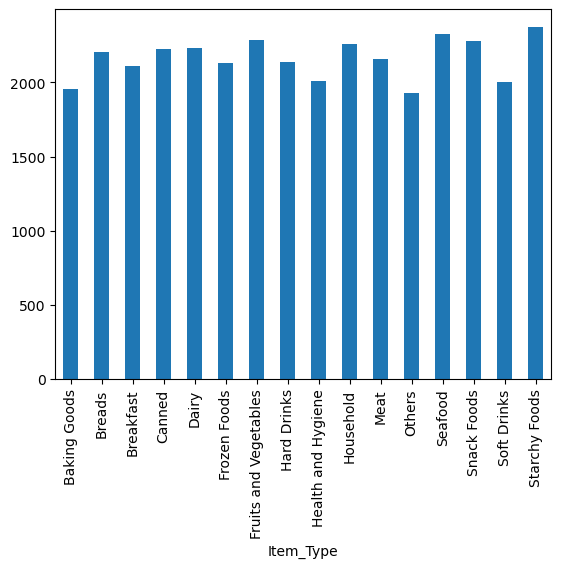

In [77]:
a=df.groupby('Item_Type')['Item_Outlet_Sales'].mean()
print(a.plot(kind='bar'))

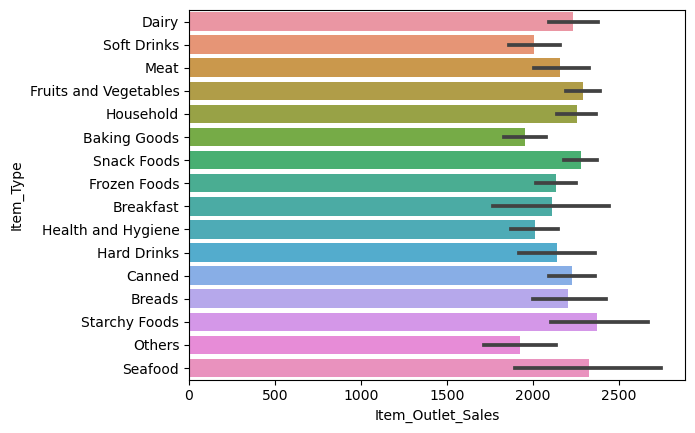

In [78]:
sns.barplot(data=df, x="Item_Outlet_Sales", y="Item_Type")
plt.show()

In [79]:
type_ols = ols('Item_Outlet_Sales ~ Outlet_Type', data=df).fit()
table = anova_lm(type_ols,typ=2)
print(table)

                   sum_sq      df           F  PR(>F)
Outlet_Type  5.945604e+09     3.0  894.650012     0.0
Residual     1.887166e+10  8519.0         NaN     NaN


AxesSubplot(0.125,0.11;0.775x0.77)


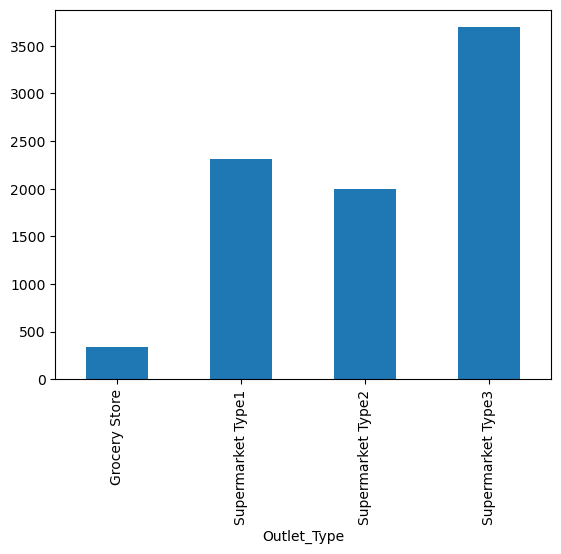

In [80]:
b=df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()
print(b.plot(kind='bar'))

In [81]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [82]:
type_ols = ols('Item_Outlet_Sales ~ Item_Fat_Content', data=df).fit()
table = anova_lm(type_ols,typ=2)
print(table)

                        sum_sq      df         F    PR(>F)
Item_Fat_Content  2.009519e+07     4.0  1.725709  0.141221
Residual          2.479717e+10  8518.0       NaN       NaN


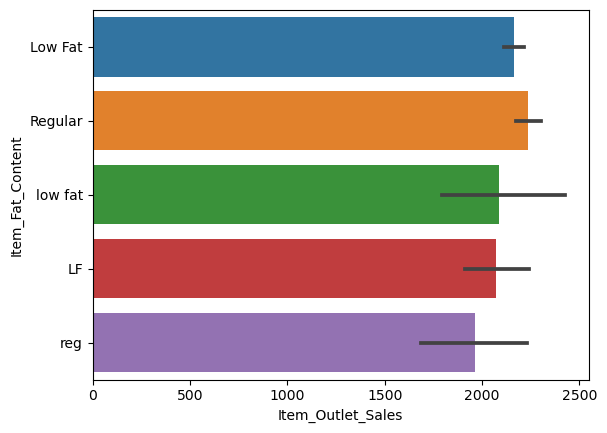

In [83]:
sns.barplot(data=df, x="Item_Outlet_Sales", y="Item_Fat_Content")
plt.show()

In [84]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'], ['Low Fat', 'Low Fat','Regular'])

In [85]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [86]:
type_ols = ols('Item_Outlet_Sales ~ Item_Fat_Content', data=df).fit()
table = anova_lm(type_ols,typ=2)
print(table)

                        sum_sq      df         F    PR(>F)
Item_Fat_Content  8.695560e+06     1.0  2.986664  0.083989
Residual          2.480857e+10  8521.0       NaN       NaN


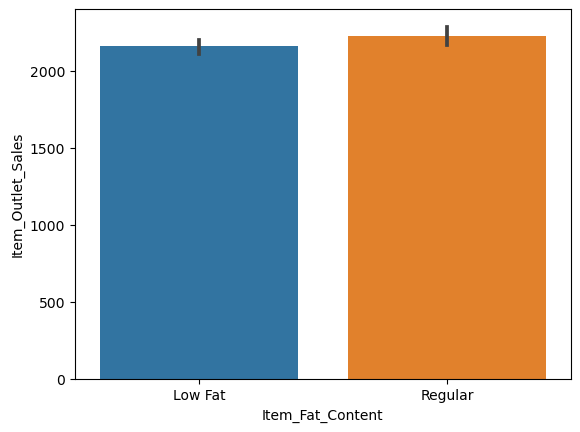

In [87]:
sns.barplot(data=df, y="Item_Outlet_Sales", x="Item_Fat_Content")

plt.show()

In [91]:
type_ols = ols('Item_MRP ~ Item_Type', data=df).fit()
table = anova_lm(type_ols,typ=2)
print(table)

                 sum_sq      df         F        PR(>F)
Item_Type  4.121512e+05    15.0  7.161793  6.514365e-16
Residual   3.263773e+07  8507.0       NaN           NaN


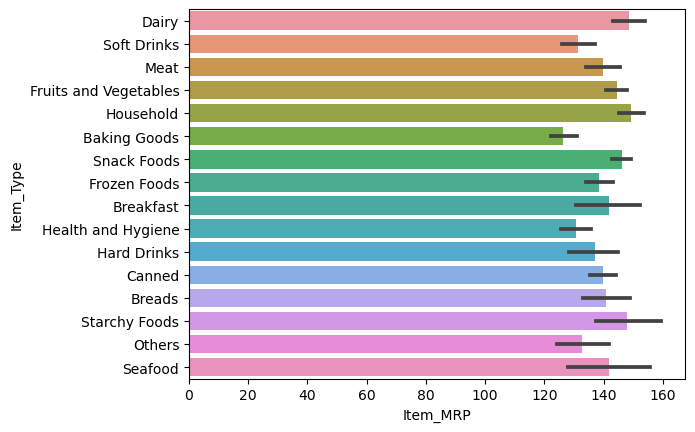

In [92]:
sns.barplot(data=df, y="Item_Type", x="Item_MRP")

plt.show()